In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import linregress
from lmfit import Model

In [3]:
# col = ['Energy (eV)', 'Psi (65)', 'Delta (65)', 'Psi (70)', 'Delta (70)', 'Psi (75)', 'Delta (75)', 'Fit Psi (65)', 'Fit Delta (65)', 'Fit Psi (70)', 'Fit Delta (70)', 'Fit Psi (75)', 'Fit Delta (75)']
# angles = [str(i) for i in np.arange(65, 80, 5)]
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Ellipsometry\ALD_TiO2_on_Si'
# files = [os.path.join(path, i) for i in os.listdir(path) if '.txt' in i]
# df = pd.read_csv(files[1], skiprows=3, names = col, sep = '\t', index_col=False)

# cat_df = pd.DataFrame()
# n = 1
# for i in angles:
#     df_angle = pd.concat([df[col[0]], df[col[n]], df[col[n+1]], df[col[n+6]], df[col[n+7]]], axis = 1)
#     df_angle = df_angle.rename(columns={col[n] : 'Psi', col[n+1] : 'Delta', col[n+6] : 'Fit Psi', col[n+7] : 'Fit Delta'})
#     df_angle['Angle'] = i
#     cat_df = pd.concat([cat_df, df_angle], ignore_index=True)
#     n += 2

# # fig, ax = plt.subplots(dpi = 200)
# # ax2 = plt.twinx()
# # sns.lineplot(data = cat_df, x = col[0], y = 'Psi', hue = 'Angle', ax = ax)
# # sns.lineplot(data = cat_df, x = col[0], y = 'Delta', hue = 'Angle', ax = ax2, legend=True)

# # sns.lineplot(data = cat_df, x = col[0], y = 'Fit Psi', hue = 'Angle', ax = ax, legend=False, palette='Greys', linestyle = '--')
# # sns.lineplot(data = cat_df, x = col[0], y = 'Fit Delta', hue = 'Angle', ax = ax2, legend=True, palette='Greys', linestyle = '--')

# # test = cat_df.loc[cat_df['Angle'] == '75'].copy()

# # fig, ax = plt.subplots(dpi = 100)
# # sns.lineplot(data = test, x = col[0], y = 'Psi')
# # sns.lineplot(data = test, x = col[0], y = 'Fit Psi', label = 'Fit')

# # fig, ax = plt.subplots(dpi = 100)
# # sns.lineplot(data = test, x = col[0], y = 'Delta')
# # sns.lineplot(data = test, x = col[0], y = 'Fit Delta')
# # files

Grow rate = 0.061 nm/cycle
Intercept = 1.188 nm
r^2 = 0.98263


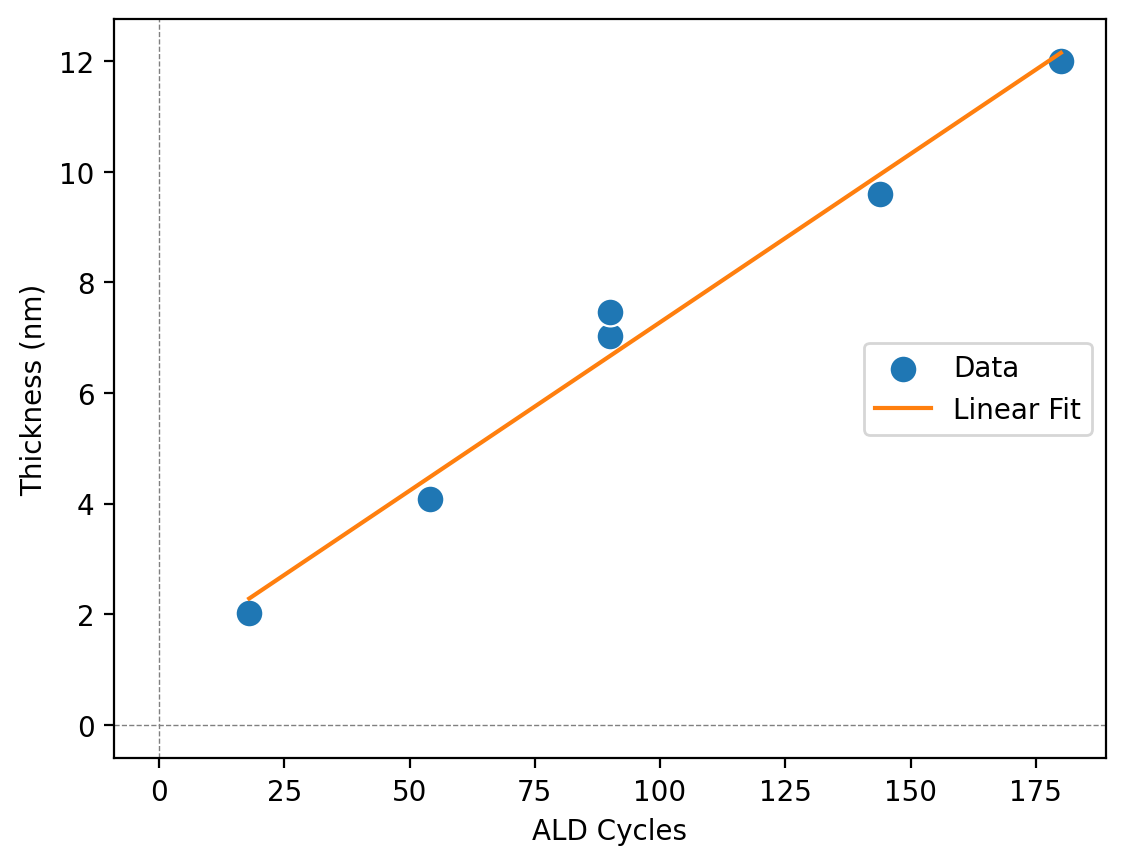

In [2]:
grow_rate = pd.DataFrame({'ALD Cycles' : [18, 54, 90, 90, 144, 180],
                          'Thickness (nm)' : [2.02, 4.09, 7.04, 7.46, 9.60, 12]
                          })

def line(x, m, b):
    return x * m + b

# line_mod = Model(line)
# line_params = line_mod.make_params(m = 1, b = 1)
# line_params['b'].set(value = 0, vary = True) #, min = 0)

# result_0 = line_mod.fit(grow_rate['Thickness (nm)'], line_params, x = grow_rate['ALD Cycles'])
# print(result_0.fit_report())

result = linregress(grow_rate['ALD Cycles'], grow_rate['Thickness (nm)'])  # slope, intercept, rvalue, pvalue, stderr, intercept_stderr

fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = grow_rate, x = 'ALD Cycles', y = 'Thickness (nm)', s = 100, label = 'Data')
plt.plot(grow_rate['ALD Cycles'], grow_rate['ALD Cycles'] * result[0] + result[1], label = 'Linear Fit', c = 'tab:orange')
# plt.plot(grow_rate['ALD Cycles'], result_0.best_fit, label = 'Linear Fit (lmfit) ', c = 'tab:red')
ax.legend()
# print(0.07 * 18 )
slope = result[0]
intercept = result[1]
r_sqr = result[2]**2

print('Grow rate = ' + str(round(slope, 3)) + ' nm/cycle')
print('Intercept = ' + str(round(intercept, 3)) + ' nm') 
print('r^2 = ' + str(round(r_sqr, 5)))
# ax.plot([-5,90], [0,0], color = 'gray')
# ax.plot([0,0], [-0.5,7.5], color = 'gray')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Horizontal zero line
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)  # Vertical zero line

# ax.set_xlim(-5,150)
# ax.set_ylim(-0.5, 8)

In [5]:
line(144, slope, intercept)
# print(18 * 8)

9.9585